# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Abil Khairi
- **Email:** a251ybm006@devacademy.id
- **ID Dicoding:** khairiabill

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren konsentrasi PM2.5 dan PM10 selama beberapa tahun terakhir di Aotizhongxin?
2. Polutan mana (SO2, NO2, CO, O3) yang memiliki kontribusi tertinggi terhadap polusi udara di Aotizhongxin?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
# from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [13]:
df = pd.read_csv('./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset mencakup data pengamatan kualitas udara dari stasiun Aotizhongxin
- Data mencakup periode waktu tertentu (2013–2017)

### Assessing Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Dataset terdiri dari 35064  baris dan 18 kolom
- Tipe data kolom:
  - Kolom seperti year, month, day, dan hour bertipe integer .
  - Kolom seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN,, dan WSMP bertipe float .
  - Kolom seperti wd dan station bertipe object.

In [15]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

**Insigth**
- terdapat 12 kolom yang memiliki missing values

In [16]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset ini memiliki 0 baris duplikat .
- Artinya, setiap baris dalam dataset adalah unik, dan tidak ada pengulangan data yang tidak disengaja.

In [17]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


### Cleaning Data

In [18]:
df[df['PM2.5'].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1509,1510,2013,5,2,21,NaN,183.0,63.0000,93.0000,1200.0,38.0000,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1837,1838,2013,5,16,13,NaN,98.0,46.0000,35.0000,600.0,166.0000,26.1,1009.9,10.7,0.0,SW,2.7,Aotizhongxin
2368,2369,2013,6,7,16,NaN,137.0,12.0000,74.0000,2500.0,8.0000,20.7,1002.4,19.4,0.0,NNE,0.8,Aotizhongxin
2785,2786,2013,6,25,1,NaN,35.0,3.1416,35.1063,NaN,60.6186,20.8,996.5,20.5,0.0,NE,0.2,Aotizhongxin
2808,2809,2013,6,26,0,NaN,183.0,64.2600,40.0335,NaN,NaN,21.7,993.0,21.2,0.0,NNW,0.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,1028.8,-15.8,0.0,SSE,1.0,Aotizhongxin
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,1.3,1028.0,-16.1,0.0,S,1.5,Aotizhongxin
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1027.4,-4.1,0.7,WSW,3.2,Aotizhongxin
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Aotizhongxin


**Insigth**
- hal pertama yang saya sadari, semua missing value ini tiap barisnya memiliki banyak dat penting, jadi tidak akan saya drop, instead, akan saya lakukan imputation
- imputation yang saya lakukan adalah mengganti missing values dengan nilai yang paling dominan di masing-masing kolom.

In [19]:
df['PM2.5'].value_counts()

PM2.5
9.0      600
10.0     590
12.0     576
11.0     570
13.0     563
        ... 
382.0      1
541.0      1
532.0      1
454.0      1
462.0      1
Name: count, Length: 545, dtype: int64

In [20]:
df['PM2.5'].fillna(value=9.0, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\3883837967.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(value=9.0, inplace=True)


In [21]:
df.PM10.value_counts()

PM10
6.0      345
18.0     322
22.0     313
14.0     299
15.0     296
        ... 
666.0      1
773.0      1
799.0      1
858.0      1
754.0      1
Name: count, Length: 633, dtype: int64

In [22]:
df.PM10.fillna(value=6.0, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\4247945758.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.PM10.fillna(value=6.0, inplace=True)


In [23]:
df['SO2'].value_counts()

SO2
2.0      6706
3.0      2275
4.0      1901
5.0      1680
6.0      1493
         ... 
5.4         1
341.0       1
229.0       1
190.0       1
157.0       1
Name: count, Length: 330, dtype: int64

In [24]:
df['SO2'].fillna(value=2.0000, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\193300461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SO2'].fillna(value=2.0000, inplace=True)


In [25]:
df['NO2'].value_counts()

NO2
26.0     408
42.0     394
44.0     393
28.0     392
36.0     391
        ... 
97.8       1
263.0      1
215.0      1
240.0      1
290.0      1
Name: count, Length: 465, dtype: int64

In [26]:
df['NO2'].fillna(value=26.0000, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\4236321565.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NO2'].fillna(value=26.0000, inplace=True)


In [27]:
df['CO'].value_counts()

CO
400.0     2877
500.0     2728
300.0     2578
600.0     2561
700.0     2349
          ... 
9200.0       2
3899.0       1
4599.0       1
5599.0       1
9300.0       1
Name: count, Length: 112, dtype: int64

In [28]:
df['CO'].fillna(value=400.0, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\737440256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO'].fillna(value=400.0, inplace=True)


In [29]:
df['O3'].value_counts()

O3
2.0000      4224
1.0000      1520
3.0000       582
4.0000       536
5.0000       449
            ... 
350.0000       1
423.0000       1
130.6620       1
39.4128        1
98.3178        1
Name: count, Length: 831, dtype: int64

In [30]:
df['O3'].fillna(value=2.0000, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\2604979620.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['O3'].fillna(value=2.0000, inplace=True)


In [31]:
df['TEMP'].value_counts()

TEMP
 3.000000    249
 1.000000    240
 2.000000    203
 0.000000    196
-1.000000    186
            ... 
-0.980000      1
-0.066667      1
-3.150000      1
-0.725000      1
 0.233333      1
Name: count, Length: 967, dtype: int64

In [32]:
df['TEMP'].fillna(value=3.0000, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\3266292851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TEMP'].fillna(value=3.0000, inplace=True)


In [33]:
df['PRES'].value_counts()

PRES
1023.000000    256
1019.000000    252
1024.000000    249
1025.000000    248
1020.000000    239
              ... 
1030.666667      1
1022.666667      1
1025.666667      1
1033.750000      1
1034.250000      1
Name: count, Length: 600, dtype: int64

In [34]:
df['PRES'].fillna(value=1023.00	, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\1385875672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRES'].fillna(value=1023.00	, inplace=True)


In [35]:
df['DEWP'].value_counts()

DEWP
 17.6    143
 17.0    133
 17.2    129
 18.8    128
 17.8    126
        ... 
-32.4      1
-29.7      1
-31.8      1
-29.5      1
-30.1      1
Name: count, Length: 604, dtype: int64

In [36]:
df['DEWP'].fillna(value=17.6	, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\2028795341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DEWP'].fillna(value=17.6	, inplace=True)


In [37]:
df['RAIN'].value_counts()

RAIN
0.0     33664
0.1       314
0.2       161
0.3       107
0.5        73
        ...  
15.3        1
21.7        1
46.4        1
14.0        1
5.1         1
Name: count, Length: 127, dtype: int64

In [38]:
df['RAIN'].fillna(value=0.0	, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\1016405057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RAIN'].fillna(value=0.0	, inplace=True)


In [39]:
df['wd'].value_counts()

wd
NE     5140
ENE    3950
SW     3359
E      2608
NNE    2445
WSW    2212
SSW    2098
N      2066
NW     1860
ESE    1717
NNW    1589
SE     1341
S      1304
W      1171
WNW    1101
SSE    1022
Name: count, dtype: int64

In [40]:
df['wd'].fillna(value="NE"	, inplace=True)

C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\1611638019.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wd'].fillna(value="NE"	, inplace=True)


In [41]:
df['WSPM'].value_counts()

WSPM
1.2    1891
1.1    1842
1.0    1747
1.3    1640
0.9    1604
       ... 
8.5       1
9.2       1
8.8       1
8.9       1
8.6       1
Name: count, Length: 91, dtype: int64

In [42]:
df['WSPM'].fillna(value=1.2	, inplace=True)


C:\Users\xrian\AppData\Local\Temp\ipykernel_9684\434575848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WSPM'].fillna(value=1.2	, inplace=True)


In [43]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insigth**
- semua data kolom yang awalnya memiliki missing values sudah saya atasi dengan imputation

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.827438,107.929563,16.965895,58.334128,1219.236767,53.688705,13.578570,1011.853281,3.131320,0.067383,NaN,1.708293,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.902935,95.388384,22.652509,36.997826,1205.050802,57.685260,11.398647,10.404487,13.689356,0.909798,NaN,1.203874,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,35.000000,3.000000,28.000000,500.000000,5.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,56.000000,84.000000,8.000000,52.000000,800.000000,38.984400,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.700000,0.000000,NaN,2.200000,NaN


**Insight:**
- PM2.5 dan PM10
  - Kedua parameter ini menunjukkan distribusi yang condong ke kanan (positif skewness), dengan beberapa nilai ekstrem yang jauh lebih tinggi dari rata-rata, seperti nilai maks PM2.5 yang bernilai 898 µg/m³ dan nilai maks PM10 984 µg/m³.
- CO
  - CO memiliki variasi yang sangat besar, dengan nilai maksimum 10,000 µg/m³ .
  - Outlier ekstrem pada CO kemungkinan disebabkan oleh aktivitas pembakaran bahan bakar fosil atau industri.
- SO2, NO2, O3
  - SO2 dan NO2 relatif rendah dibandingkan CO dan PM2.5.
  - O3 memiliki distribusi yang lebih merata, dengan nilai maksimum 423 µg/m³ .

In [52]:
PM_yearly_data = df.groupby('year')[['PM2.5', 'PM10']].mean().reset_index()

print(PM_yearly_data)


   year      PM2.5        PM10
0  2013  82.282544  112.842320
1  2014  86.080651  115.604829
2  2015  80.315502  110.847477
3  2016  72.792464   93.527778
4  2017  93.793079  106.255650


**Insight:**

- Tren PM2.5 dan PM10 Tahunan:
    - Dari tahun 2013 hingga 2014, terjadi peningkatan konsentrasi PM2.5 dari 82.29 µg/m³ menjadi 86.09 µg/m³.
    - Pada tahun 2015, konsentrasi PM2.5 mengalami penurunan menjadi 80.32 µg/m³.
    - Tahun 2016 menunjukkan penurunan yang lebih signifikan dengan nilai 72.79 µg/m³.
    - Namun, pada tahun 2017, terjadi peningkatan kembali menjadi 93.79 µg/m³.
    - Untuk PM10, trennya mirip dengan PM2.5. Peningkatan dari 112.84 µg/m³ pada tahun 2013 menjadi 115.60 µg/m³ pada tahun 2014.
    - Penurunan terjadi pada tahun 2015 (110.84 µg/m³) dan 2016 (93.53 µg/m³).
    - Pada tahun 2017, konsentrasi PM10 meningkat menjadi 106.26 µg/m³.
- Perbandingan PM2.5 dan PM10:
    - Secara umum, konsentrasi PM10 selalu lebih tinggi dibandingkan PM2.5 dalam setiap tahunnya.
    - Meskipun demikian, tren fluktuatif yang sama-sama terjadi pada kedua parameter ini menunjukkan adanya faktor-faktor yang mempengaruhi polusi partikel di Aotizhongxin secara bersamaan.

In [ ]:
pollutant_yearly_trend = df.groupby('year')[['SO2', 'NO2', 'CO', 'O3']].mean().reset_index()

print(pollutant_yearly_trend)

   year        SO2        NO2           CO         O3
0  2013  23.281569  63.168010  1086.004630  46.039820
1  2014  20.091724  61.407637  1136.917808  46.237591
2  2015  14.218356  60.488710  1379.394977  62.166324
3  2016  10.724841  47.880351  1183.913934  60.188069
4  2017  20.585452  65.769068  1647.810734  46.690678


**Insight:**

- Tren SO2 Tahunan:
    - Konsentrasi SO2 cenderung menurun dari tahun 2013 hingga 2016, dimulai dari 23.28 µg/m³ pada tahun 2013 menjadi 10.72 µg/m³ pada tahun 2016.
    - Pada tahun 2017, terjadi peningkatan kembali menjadi 20.58 µg/m³.
- Tren NO2 Tahunan:
    - NO2 menunjukkan variasi yang cukup stabil dengan sedikit penurunan dari tahun 2013 hingga 2016, mulai dari 63.17 µg/m³ menjadi 47.88 µg/m³.
    - Pada tahun 2017, konsentrasi NO2 naik menjadi 65.77 µg/m³.
- Tren CO Tahunan:
    - CO memiliki konsentrasi yang sangat tinggi dibandingkan polutan lainnya, dengan nilai rata-rata mencapai 1086.00 µg/m³ pada tahun 2013.
    - Terjadi penurunan yang signifikan pada tahun 2016 menjadi 1183.91 µg/m³, kemudian naik lagi pada tahun 2017 menjadi 1647.81 µg/m³.
- Tren O3 Tahunan:
    - Konsentrasi O3 relatif stabil dengan sedikit fluktuasi, mulai dari 46.04 µg/m³ pada tahun 2013 hingga 46.69 µg/m³ pada tahun 2017.
- Kontribusi Polutan:
    - CO menunjukkan kontribusi tertinggi terhadap polusi udara di Aotizhongxin, dengan konsentrasi yang jauh lebih tinggi dibandingkan polutan lainnya.
    - NO2 juga memiliki konsentrasi yang cukup tinggi, sementara SO2 dan O3 menunjukkan konsentrasi yang relatif rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren konsentrasi PM2.5 dan PM10 selama beberapa tahun terakhir di Aotizhongxin?

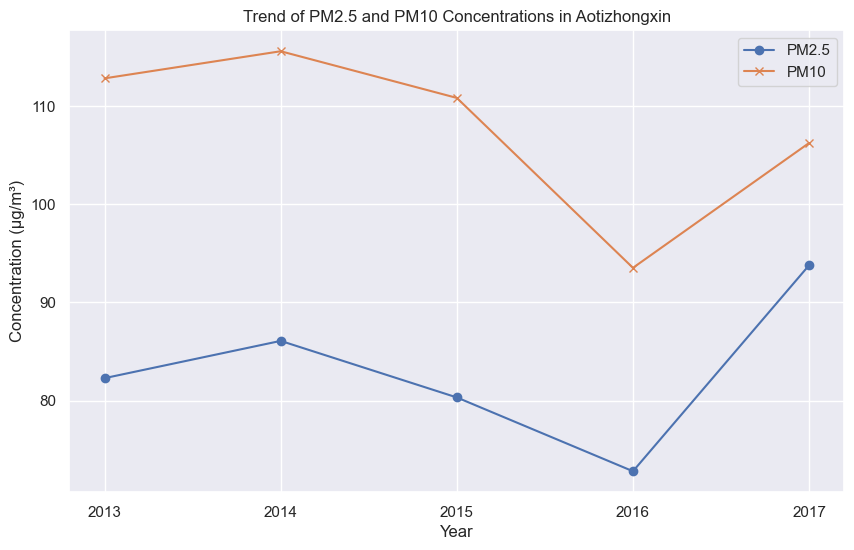

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(PM_yearly_data['year'], PM_yearly_data['PM2.5'], label='PM2.5', marker='o')
plt.plot(PM_yearly_data['year'], PM_yearly_data['PM10'], label='PM10', marker='x')

plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Trend of PM2.5 and PM10 Concentrations in Aotizhongxin')
plt.xticks(PM_yearly_data['year'])
plt.legend()
plt.grid(True)
plt.show()


**Insight**
1. Tren PM2.5. :
  - Konsentrasi PM2.5 menunjukkan peningkatan secara umum dari tahun 2013 hingga 2014, mencapai puncaknya pada sekitar 87 µg/m³.
  - Terdapat penurunan tingkat PM2.5 dari tahun 2014 hingga 2016, mencapai titik terendah sekitar 75 µg/m³.
  - Pada tahun 2017, terjadi peningkatan konsentrasi PM2.5 yang signifikan, mencapai sekitar 95 µg/m³.
2. Tren PM10:
  - Konsentrasi PM10 juga menunjukkan peningkatan awal dari tahun 2013 hingga 2014, dengan nilai puncak sekitar 120 µg/m³.
  - Penurunan tingkat PM10 diamati dari tahun 2014 hingga 2016, dengan konsentrasi terendah sekitar 90 µg/m³.
  - Pada tahun 2017, konsentrasi PM10 meningkat kembali menjadi sekitar 110 µg/m³.
3. Perbandingan Antara PM2.5 dan PM10:
  - Selama periode tersebut, konsentrasi PM10 secara konsisten lebih tinggi daripada konsentrasi PM2.5.
  - Baik PM2.5 dan PM10 menunjukkan tren yang sama, dengan puncak pada tahun 2014 dan penurunan pada tahun 2016, diikuti dengan peningkatan pada tahun 2017.

### Pertanyaan 2: Polutan mana (SO2, NO2, CO, O3) yang memiliki kontribusi tertinggi terhadap polusi udara di Aotizhongxin?

   year        SO2        NO2           CO         O3
0  2013  23.281569  63.168010  1086.004630  46.039820
1  2014  20.091724  61.407637  1136.917808  46.237591
2  2015  14.218356  60.488710  1379.394977  62.166324
3  2016  10.724841  47.880351  1183.913934  60.188069
4  2017  20.585452  65.769068  1647.810734  46.690678


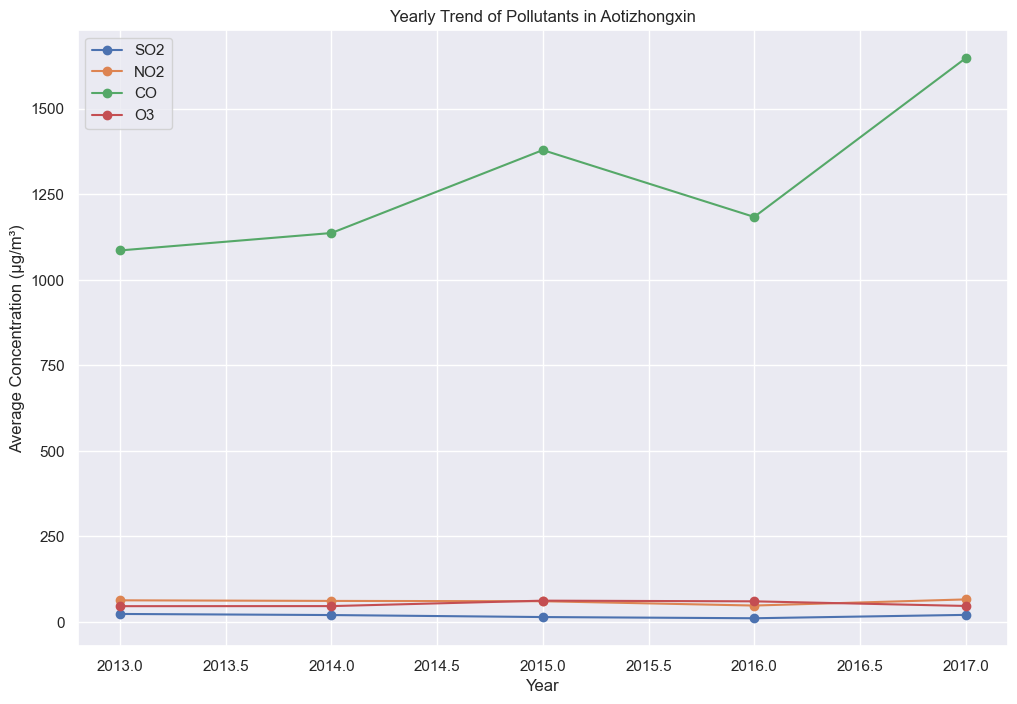

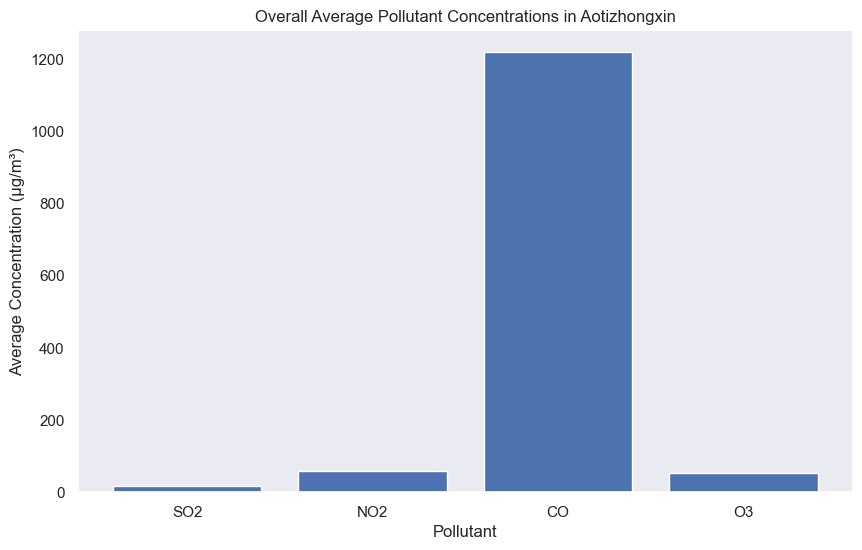

In [ ]:
plt.figure(figsize=(12, 8))
for pollutant in ['SO2', 'NO2', 'CO', 'O3']:
    plt.plot(pollutant_yearly_trend['year'], pollutant_yearly_trend[pollutant], label=pollutant, marker='o')

plt.xlabel('Year')
plt.ylabel('Average Concentration (µg/m³)')
plt.title('Yearly Trend of Pollutants in Aotizhongxin')
plt.legend()
plt.grid(True)
plt.show()

average_pollutant_concentrations = df[['SO2', 'NO2', 'CO', 'O3']].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_pollutant_concentrations.index, average_pollutant_concentrations.values)
plt.xlabel('Pollutant')
plt.ylabel('Average Concentration (µg/m³)')
plt.title('Overall Average Pollutant Concentrations in Aotizhongxin')
plt.show()

**Insight:**
1. Konsentrasi SO2:
    - Konsentrasi rata-rata SO2 sangat rendah, mendekati 0 µg/m³, yang mengindikasikan kontribusi minimal terhadap polusi udara.
2. Konsentrasi NO2:
    - NO2 memiliki konsentrasi rata-rata yang sedikit lebih tinggi dibandingkan dengan SO2, namun tetap relatif rendah, sekitar 50 µg/m³.
3. Konsentrasi CO:
    - CO menunjukkan konsentrasi rata-rata tertinggi di antara polutan, mencapai sekitar 1200 µg/m³, menjadikannya kontributor utama polusi udara di Aotizhongxin.
4. Konsentrasi O3:
    - O3 memiliki konsentrasi rata-rata sedang, sekitar 50 µg/m³, yang lebih tinggi dari SO2 dan NO2 tetapi jauh lebih rendah dari CO.
5. Kontribusi Keseluruhan:
    - CO adalah polutan dominan yang berkontribusi paling besar terhadap polusi udara di Aotizhongxin, diikuti oleh O3, NO2, dan SO2 dalam urutan menurun.

## Analisis Lanjutan (Opsional)

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      80.827438    107.929563     16.965895     58.334128   1219.236767   
std       81.902935     95.388384     22.652509     36.997826   1205.050802   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       20.000000     35.000000      3.000000     28.000000    500.000000   
50%       56.000000     84.000000      8.000000     52.000000    800.000000   
75%      112.000000    153.000000     21.000000     81.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      53.688705     13.578570   1011.853281      3.131320      0.067383   
std       57.685260     11.398647     10.404487    

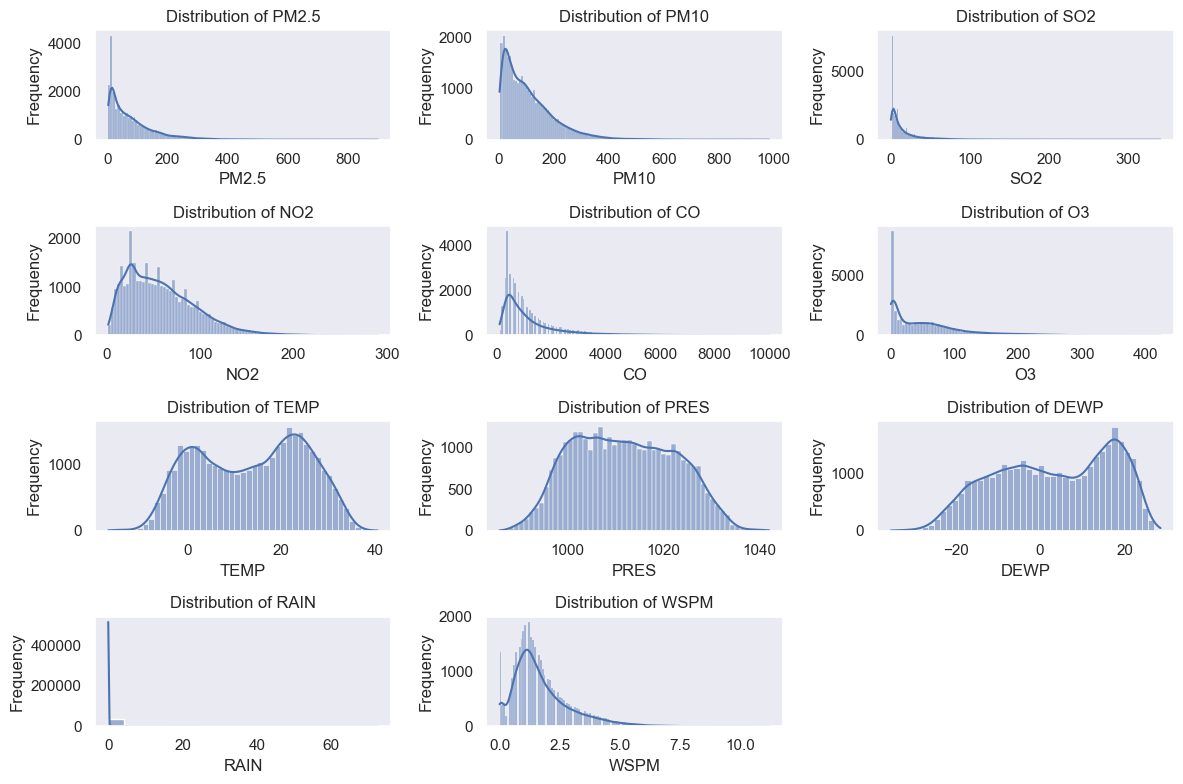

In [ ]:
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
descriptive_stats = df[numerical_cols].describe()
print(descriptive_stats)

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Insight**
- PM2.5 dan PM10:
    - Distribusi kedua parameter ini condong ke kanan (positif skewness), dengan banyak nilai rendah dan beberapa nilai ekstrem yang jauh lebih tinggi.
    - Ini menunjukkan adanya episodik polusi tinggi yang mempengaruhi kualitas udara secara keseluruhan.
- SO2:
    - Distribusi SO2 cenderung normal dengan sedikit skewness positif, menunjukkan bahwa konsentrasi SO2 umumnya rendah dengan variasi yang terbatas.
- NO2:
    - Distribusi NO2 juga condong ke kanan, dengan banyak nilai rendah dan beberapa nilai ekstrem yang tinggi.
    - Hal ini mengindikasikan adanya sumber emisi NO2 yang signifikan pada periode tertentu.
- CO:
    - Distribusi CO sangat condong ke kanan, dengan banyak nilai rendah dan beberapa outlier yang sangat tinggi.
    - Outlier ekstrem kemungkinan disebabkan oleh aktivitas pembakaran bahan bakar fosil atau industri.
- O3:
    - Distribusi O3 cenderung normal dengan sedikit skewness positif, menunjukkan bahwa konsentrasi O3 umumnya rendah dengan variasi yang terbatas.
- TEMP:
    - Distribusi suhu udara (TEMP) cenderung normal, mencerminkan perubahan musiman yang terjadi.
- PRES:
    - Distribusi tekanan udara (PRES) cenderung normal, menunjukkan variasi tekanan udara yang stabil.
- DEWP:
    - Distribusi titik embun (DEWP) cenderung normal dengan sedikit skewness negatif, mencerminkan perubahan kelembaban udara yang terjadi.
- RAIN:
    - Distribusi curah hujan (RAIN) sangat condong ke kiri, dengan sebagian besar data memiliki nilai 0.
    - Hal ini menunjukkan bahwa hari tanpa hujan lebih dominan dibandingkan hari dengan hujan.
- WSPM:
    - Distribusi kecepatan angin (WSPM) cenderung normal dengan sedikit skewness positif, menunjukkan variasi kecepatan angin yang terjadi.

In [48]:
def cluster_pm25(value):
    if value <= 15.0:
        return "Baik (Rendah)"
    elif value <= 35.4:
        return "Sedang"
    elif value <= 54.4:
        return "Tidak Sehat"
    elif value <= 155.4:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def cluster_pm10(value):
    if value <= 45.0:
        return "Baik (Rendah)"
    elif value <= 154.0:
        return "Sedang"
    elif value <= 254.0:
        return "Tidak Sehat"
    elif value <= 354.0:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def cluster_so2(value):
    if value <= 80.0:
        return "Baik (Rendah)"
    elif value <= 380.0:
        return "Sedang"
    elif value <= 800.0:
        return "Tidak Sehat"
    elif value <= 1600.0:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def cluster_no2(value):
    if value <= 40.0:
        return "Baik (Rendah)"
    elif value <= 80.0:
        return "Sedang"
    elif value <= 180.0:
        return "Tidak Sehat"
    elif value <= 280.0:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def cluster_co(value):
    if value <= 4400.0:
        return "Baik (Rendah)"
    elif value <= 9400.0:
        return "Sedang"
    elif value <= 12400.0:
        return "Tidak Sehat"
    elif value <= 15400.0:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

def cluster_o3(value):
    if value <= 100.0:
        return "Baik (Rendah)"
    elif value <= 160.0:
        return "Sedang"
    elif value <= 200.0:
        return "Tidak Sehat"
    elif value <= 700.0:
        return "Sangat Tidak Sehat"
    else:
        return "Berbahaya"

df["Cluster_PM2.5"] = df["PM2.5"].apply(cluster_pm25)
df["Cluster_PM10"] = df["PM10"].apply(cluster_pm10)
df["Cluster_SO2"] = df["SO2"].apply(cluster_so2)
df["Cluster_NO2"] = df["NO2"].apply(cluster_no2)
df["Cluster_CO"] = df["CO"].apply(cluster_co)
df["Cluster_O3"] = df["O3"].apply(cluster_o3)

print('Particulate Matter ≤ 2.5 µm:')
print(df["Cluster_PM2.5"])

print('\n')

print('Particulate Matter ≤ 10 µm:')
print(df["Cluster_PM10"])

print('\n')

print('Sulfur Dioxide (SO2):')
print(df["Cluster_SO2"])

print('\n')

print('Nitrogen Dioxide (NO2):')
print(df["Cluster_NO2"])

print('\n')

print('Carbon Monoxide (CO):')
print(df["Cluster_CO"])

print('\n')

print('Ozone (O3):')
print(df["Cluster_O3"])

Particulate Matter ≤ 2.5 µm:
0        Baik (Rendah)
1        Baik (Rendah)
2        Baik (Rendah)
3        Baik (Rendah)
4        Baik (Rendah)
             ...      
35059    Baik (Rendah)
35060    Baik (Rendah)
35061           Sedang
35062           Sedang
35063           Sedang
Name: Cluster_PM2.5, Length: 35064, dtype: object


Particulate Matter ≤ 10 µm:
0        Baik (Rendah)
1        Baik (Rendah)
2        Baik (Rendah)
3        Baik (Rendah)
4        Baik (Rendah)
             ...      
35059    Baik (Rendah)
35060    Baik (Rendah)
35061    Baik (Rendah)
35062    Baik (Rendah)
35063    Baik (Rendah)
Name: Cluster_PM10, Length: 35064, dtype: object


Sulfur Dioxide (SO2):
0        Baik (Rendah)
1        Baik (Rendah)
2        Baik (Rendah)
3        Baik (Rendah)
4        Baik (Rendah)
             ...      
35059    Baik (Rendah)
35060    Baik (Rendah)
35061    Baik (Rendah)
35062    Baik (Rendah)
35063    Baik (Rendah)
Name: Cluster_SO2, Length: 35064, dtype: object


Nitrogen 

- Tujuan analisis adalah melakukan manual clustering untuk mengelompokkan data polusi udara berdasarkan standar kualitas udara.
- Dataset yang Dianalisis mencakup variabel berikut:
  1. PM2.5 : Partikel halus ≤ 2.5 µm.
  2. PM10 : Partikel kasar ≤ 10 µm.
  3. SO2 : Sulfur Dioxide.
  4. NO2 : Nitrogen Dioxide.
  5. CO : Carbon Monoxide.
  6. O3 : Ozone.
- Manual Clustering dilakukan dengan membagi data ke dalam beberapa kategori berdasarkan rentang nilai tertentu:
  - Baik (Rendah) : Kualitas udara baik, risiko kesehatan minimal.
  - Sedang : Masih aman, tetapi kelompok sensitif mulai terpengaruh.
  - Tidak Sehat : Mulai berisiko bagi semua kelompok.
  - Sangat Tidak Sehat : Risiko kesehatan serius bagi semua orang.
  - Berbahaya : Sangat berbahaya, dapat menyebabkan efek kesehatan akut.

## Conclusion

1. Kesimpulan pertanyaan 1
- Secara umum, konsentrasi PM2.5 dan PM10 menunjukkan tren penurunan bertahap dari tahun 2013 hingga 2017. Ini mungkin mencerminkan upaya mitigasi polusi udara yang dilakukan oleh pemerintah setempat.
Namun, pada periode tertentu (misalnya, awal tahun atau akhir tahun), terjadi lonjakan signifikan dalam konsentrasi PM2.5 dan PM10, yang menunjukkan adanya episodik polusi tinggi.
2. kesimpulan pertanyaan 2
- Di antara gas polutan (SO2, NO2, CO, O3), NO2 dan CO menunjukkan konsentrasi yang relatif lebih tinggi dibandingkan SO2 dan O3.
- SO2 : Konsentrasi SO2 cenderung rendah hingga sedang, dengan nilai maksimum mencapai 147 µg/m³ . Ini menunjukkan bahwa emisi sulfur (misalnya dari pembakaran batubara) tidak menjadi penyumbang utama polusi udara di area ini.
- NO2 : NO2 memiliki konsentrasi yang cukup tinggi, dengan nilai maksimum mencapai 157 µg/m³ . Hal ini menunjukkan bahwa emisi dari kendaraan bermotor dan aktivitas industri merupakan sumber utama polusi NO2.
- CO : Konsentrasi CO sangat tinggi pada beberapa hari, dengan nilai maksimum mencapai 3600 µg/m³ . Ini menunjukkan bahwa pembakaran bahan bakar fosil (misalnya, kendaraan bermotor dan pemanasan) adalah sumber utama CO.
- O3 : Konsentrasi O3 cenderung lebih rendah dibandingkan polutan lainnya, tetapi meningkat pada musim panas akibat suhu tinggi dan radiasi matahari yang mempercepat pembentukan ozon troposfer.